In [1]:
import os
import re
import csv
import numpy as np


In [2]:
cwd = os.getcwd()

# preapre CSV

In [3]:
results_path = "/Users/u7826985/Projects/Nvidia/results/2025_10_10_vector_length_comparison"
AA_folder ="100taxa_diff_trees_1M_sites_AA"
DNA_folder ="100taxa_diff_trees_1M_sites"

In [4]:
output_csv = f"{results_path}/results.csv"
output_csv_aa = f"{results_path}/results_aa.csv"

In [5]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [6]:
data = []

In [7]:
#read files in results_path

def read_files_in_directory(directory, unique_name=""):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)
        for file in files:
            if file.endswith('.txt'):
                print(f"Reading file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    #get treefile name from the txt file name
                    tree_file_name = file.split("_")[3] + "_" + file.split("_")[4]
                    
                 
                        
                    for line in f:
                        match = pattern.search(line)
                        if match:
                            backend, taxa, sites, patterns, time, likelihood = match.groups()
                            backend = file.split("_")[1] + "_" + file.split("_")[2]
                                
                            if taxa != "100":
                                continue
                            backend += unique_name
                            data.append([backend, taxa, sites, patterns, likelihood, time, tree_file_name])
    
                            # Write to CSV
                            # with open(output_csv, 'w', newline='') as csvfile:
                            #     writer = csv.writer(csvfile)
                            #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                            #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [8]:
read_files_in_directory(f"{results_path}/{AA_folder}")

Reading file: output_vector_512_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_256_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_default_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_128_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_32_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_1024_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_64_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_64_tree_2_1000000_aa_openacc_v100.txt
Reading file: output_vector_1024_tree_2_1000000_aa_openacc_v100.txt
Reading file: output_vector_128_tree_2_1000000_aa_openacc_v100.txt
Reading file: output_vector_32_tree_2_1000000_aa_openacc_v100.txt
Reading file: output_vector_256_tree_2_1000000_aa_openacc_v100.txt
Reading file: output_vector_default_tree_2_1000000_aa_openacc_v100.txt
Reading file: output_vector_512_tree_2_1000000_aa_openacc_v100.txt
Reading file: output_vector_1024_tree_3_1000000_aa_opena

In [9]:
print(data)

[['vector_512', '100', '1000000', '1000000', '-110413195.778517276048660', '1.231885527000000', 'tree_1'], ['vector_256', '100', '1000000', '1000000', '-110413195.778517276048660', '1.183883795000000', 'tree_1'], ['vector_default', '100', '1000000', '1000000', '-110413195.778517276048660', '1.219610139000000', 'tree_1'], ['vector_128', '100', '1000000', '1000000', '-110413195.778517276048660', '1.242368238000000', 'tree_1'], ['vector_32', '100', '1000000', '1000000', '-110413195.778517276048660', '1.235534098000000', 'tree_1'], ['vector_1024', '100', '1000000', '1000000', '-110413195.778517276048660', '1.237661341000000', 'tree_1'], ['vector_64', '100', '1000000', '1000000', '-110413195.778517276048660', '1.278751158000000', 'tree_1'], ['vector_64', '100', '1000000', '1000000', '-99186349.700422123074532', '1.246023748000000', 'tree_2'], ['vector_1024', '100', '1000000', '1000000', '-99186349.700422123074532', '1.149427919000000', 'tree_2'], ['vector_128', '100', '1000000', '1000000', 

In [10]:
# read_iqtree_results(iqtree_results_path)

In [11]:
print(data)

[['vector_512', '100', '1000000', '1000000', '-110413195.778517276048660', '1.231885527000000', 'tree_1'], ['vector_256', '100', '1000000', '1000000', '-110413195.778517276048660', '1.183883795000000', 'tree_1'], ['vector_default', '100', '1000000', '1000000', '-110413195.778517276048660', '1.219610139000000', 'tree_1'], ['vector_128', '100', '1000000', '1000000', '-110413195.778517276048660', '1.242368238000000', 'tree_1'], ['vector_32', '100', '1000000', '1000000', '-110413195.778517276048660', '1.235534098000000', 'tree_1'], ['vector_1024', '100', '1000000', '1000000', '-110413195.778517276048660', '1.237661341000000', 'tree_1'], ['vector_64', '100', '1000000', '1000000', '-110413195.778517276048660', '1.278751158000000', 'tree_1'], ['vector_64', '100', '1000000', '1000000', '-99186349.700422123074532', '1.246023748000000', 'tree_2'], ['vector_1024', '100', '1000000', '1000000', '-99186349.700422123074532', '1.149427919000000', 'tree_2'], ['vector_128', '100', '1000000', '1000000', 

In [12]:
# Write to CSV

def write_to_csv(data, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time","treefile"])
        writer.writerows(data)
        
        
write_to_csv(data, output_csv)

# Analysis of Results

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time,treefile
0,vector_512,100,1000000,1000000,-1.104132e+08,1.231886,tree_1
1,vector_256,100,1000000,1000000,-1.104132e+08,1.183884,tree_1
2,vector_default,100,1000000,1000000,-1.104132e+08,1.219610,tree_1
3,vector_128,100,1000000,1000000,-1.104132e+08,1.242368,tree_1
4,vector_32,100,1000000,1000000,-1.104132e+08,1.235534,tree_1


In [15]:
df

,backend,taxa,sites,patterns,likelihood,time,treefile
0,vector_512,100,1000000,1000000,-1.104132e+08,1.231886,tree_1
1,vector_256,100,1000000,1000000,-1.104132e+08,1.183884,tree_1
2,vector_default,100,1000000,1000000,-1.104132e+08,1.219610,tree_1
3,vector_128,100,1000000,1000000,-1.104132e+08,1.242368,tree_1
4,vector_32,100,1000000,1000000,-1.104132e+08,1.235534,tree_1
...,...,...,...,...,...,...,...
65,vector_1024,100,1000000,1000000,-1.065590e+08,1.200027,tree_10
66,vector_512,100,1000000,1000000,-1.065590e+08,1.299590,tree_10
67,vector_default,100,1000000,1000000,-1.065590e+08,1.169526,tree_10
68,vector_128,100,1000000,1000000,-1.065590e+08,1.195639,tree_10


In [16]:
groups = df.groupby('treefile')

In [17]:
def _basename(s):
    return os.path.basename(str(s))

def prepare(df):
    out = df.copy()
    # standardize column names if needed
    cols = {c.lower(): c for c in df.columns}
    # Expect columns named like 'tree_file', 'backend', 'time'
    # If user had different casing, map it:
    def find(colname):
        return next((c for c in df.columns if c.lower() == colname), colname)
    tree_col = find('treefile')
    backend_col = find('backend')
    time_col = find('time')

    out['treefile'] = out[tree_col].astype(str)
    out['backend']   = out[backend_col].astype(str)
    out['time']      = pd.to_numeric(out[time_col], errors='coerce')

    out['tree_key']  = out['treefile']
    # Order tree keys by natural sort on any numbers inside (helps readability)
    def _nat_key(s):
        return [int(t) if t.isdigit() else t for t in re.split(r'(\d+)', s)]
    tree_order = sorted(out['tree_key'].unique(), key=_nat_key)
    out['tree_key'] = pd.Categorical(out['tree_key'], categories=tree_order, ordered=True)

    # Optional: order backends (put CPU first, then GPU variants)
    backend_order = sorted(out['backend'].unique(), key=lambda b: (('cpu' not in b.lower()), b.lower()))
    out['backend'] = pd.Categorical(out['backend'], categories=backend_order, ordered=True)
    return out

dfp = prepare(df)

# --- 1) Grouped bars: mean time per backend for each tree ---------------------
def plot_grouped_bars(dfp, logy=True, savepath=None):
    pivot = dfp.pivot_table(index='tree_key', columns='backend', values='time', aggfunc='mean')
    ax = pivot.plot(kind='bar', figsize=(10, 5))
    ax.set_xlabel("Tree file")
    ax.set_ylabel("Runtime (s)")
    ax.set_title("runtime per tree")
    if logy:
        ax.set_yscale('log')
    ax.legend(title="Backend")
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

# --- 2) Dot plot: each run as a point (great with log scale) ------------------
def plot_dot(dfp, logy=True, savepath=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    backends = list(dfp['backend'].cat.categories) if hasattr(dfp['backend'], 'cat') else sorted(dfp['backend'].unique())
    x_pos = np.arange(len(backends))

    jitter = 0.15
    for i, b in enumerate(backends):
        y = dfp.loc[dfp['backend'] == b, 'time'].values
        x = np.random.uniform(i - jitter, i + jitter, size=len(y))
        ax.scatter(x, y, s=18, alpha=0.8)  # no explicit colors
    ax.set_xticks(x_pos)
    ax.set_xticklabels(backends, rotation=0)
    ax.set_xlabel("Backend")
    ax.set_ylabel("Runtime (s)")
    ax.set_title("Per-run runtimes by backend")
    if logy:
        ax.set_yscale('log')
    ax.grid(True, which='both', axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

# --- 3) Distribution view: boxplot by backend ---------------------------------
def plot_box(dfp, logy=True, savepath=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    dfp.boxplot(column='time', by='backend', ax=ax)  # default style, no colors set
    ax.set_title("Runtime distribution by backend")
    ax.set_ylabel("Runtime (s)")
    if logy:
        ax.set_yscale('log')
    plt.suptitle("")  # remove automatic super-title
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

# --- 4) Compact heatmap: trees x backends (mean time) -------------------------
def plot_heatmap(dfp, log=True, savepath=None):
    mat = dfp.pivot_table(index='tree_key', columns='backend', values='time', aggfunc='mean')
    data = np.log10(mat.values) if log else mat.values

    fig, ax = plt.subplots(figsize=(10, max(4, 0.4*len(mat))))
    im = ax.imshow(data, aspect='auto')  # default colormap, no color specified

    # ticks / labels
    ax.set_yticks(np.arange(mat.shape[0]))
    ax.set_yticklabels(mat.index.astype(str))
    ax.set_xticks(np.arange(mat.shape[1]))
    ax.set_xticklabels(mat.columns.astype(str), rotation=45, ha='right')
    ax.set_xlabel('Backend')
    ax.set_ylabel('Tree file')
    ax.set_title('Mean runtime heatmap (log10 seconds)' if log else 'Mean runtime heatmap (seconds)')
    fig.colorbar(im, ax=ax, label=('log10(s)' if log else 's'))
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

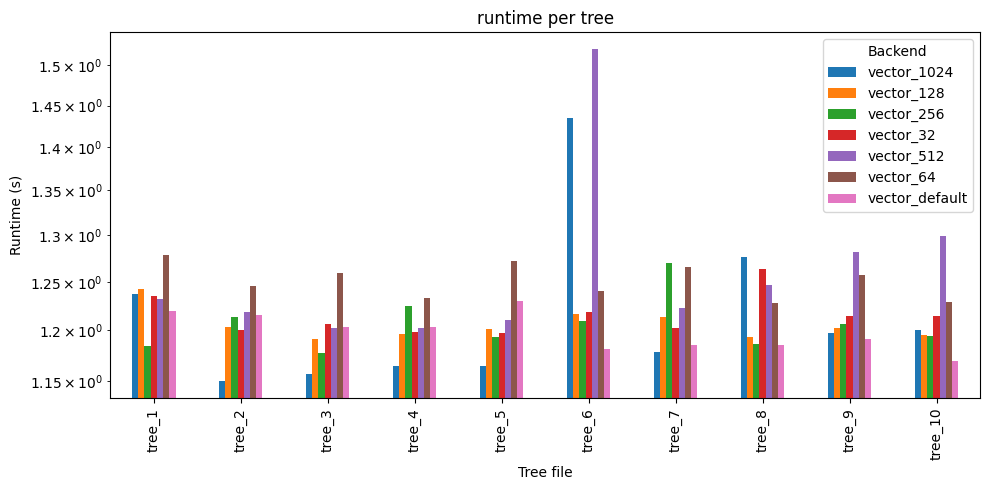

In [18]:
plot_grouped_bars(dfp, logy=True, savepath=f"{cwd}/AA_100taxa_benchmark_buildtip_likelihood.png")

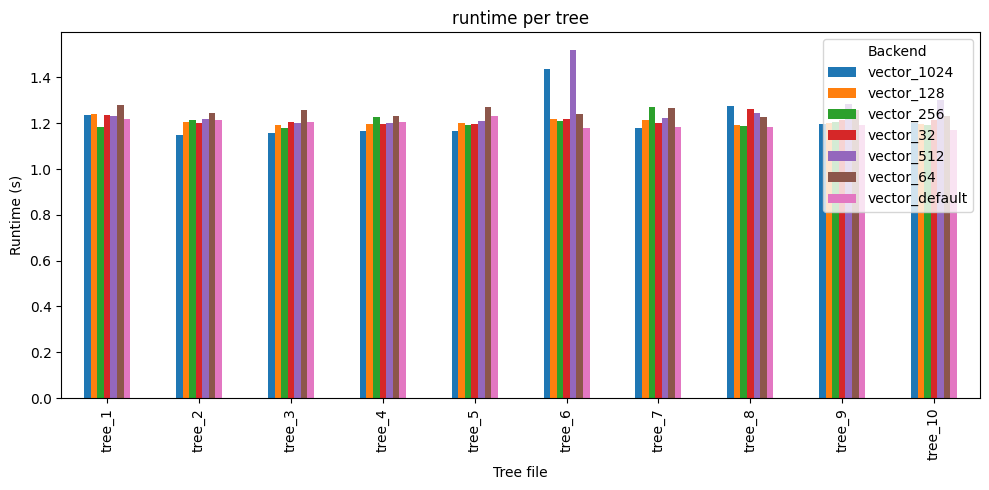

In [19]:
plot_grouped_bars(dfp, logy=False, savepath=f"{cwd}/AA_100taxa_benchmark_buildtip_likelihood_liner.png")


In [20]:
data = []

read_files_in_directory(f"{results_path}/{DNA_folder}")


data

Reading file: output_vector_32_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_128_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_default_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_512_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_1024_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_64_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_256_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_128_tree_2_1000000_dna_openacc_v100.txt
Reading file: output_vector_default_tree_2_1000000_dna_openacc_v100.txt
Reading file: output_vector_32_tree_2_1000000_dna_openacc_v100.txt
Reading file: output_vector_256_tree_2_1000000_dna_openacc_v100.txt
Reading file: output_vector_64_tree_2_1000000_dna_openacc_v100.txt
Reading file: output_vector_512_tree_2_1000000_dna_openacc_v100.txt
Reading file: output_vector_1024_tree_2_1000000_dna_openacc_v100.txt
Reading file: output_vector_1024_tree_3_10

[['vector_32',
  '100',
  '1000000',
  '1000000',
  '-70051678.096398830413818',
  '1.103308390000000',
  'tree_1'],
 ['vector_128',
  '100',
  '1000000',
  '1000000',
  '-70051678.096398830413818',
  '1.089375036000000',
  'tree_1'],
 ['vector_default',
  '100',
  '1000000',
  '1000000',
  '-70051678.096398830413818',
  '1.097374711000000',
  'tree_1'],
 ['vector_512',
  '100',
  '1000000',
  '1000000',
  '-70051678.096398830413818',
  '1.086049551000000',
  'tree_1'],
 ['vector_1024',
  '100',
  '1000000',
  '1000000',
  '-70051678.096398830413818',
  '1.127888151000000',
  'tree_1'],
 ['vector_64',
  '100',
  '1000000',
  '1000000',
  '-70051678.096398830413818',
  '1.116605489000000',
  'tree_1'],
 ['vector_256',
  '100',
  '1000000',
  '1000000',
  '-70051678.096398830413818',
  '1.103690401000000',
  'tree_1'],
 ['vector_128',
  '100',
  '1000000',
  '1000000',
  '-62357359.211786955595016',
  '1.051191462000000',
  'tree_2'],
 ['vector_default',
  '100',
  '1000000',
  '1000000'

In [21]:
write_to_csv(data, output_csv_aa)
df_aa = pd.read_csv(output_csv_aa)

dfp_aa = prepare(df_aa)

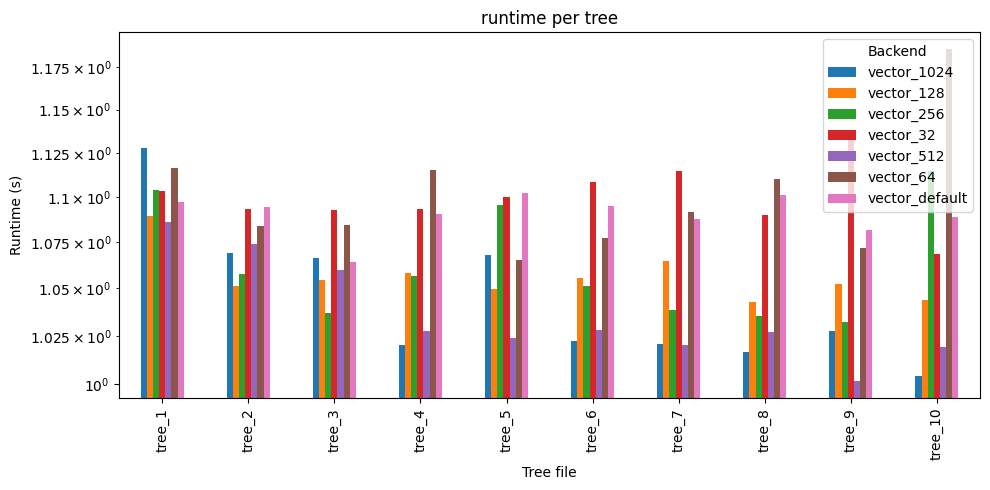

In [22]:
plot_grouped_bars(dfp_aa, logy=True, savepath=f"{cwd}/DNA_100taxa_benchmark_buildtip_likelihood.png")

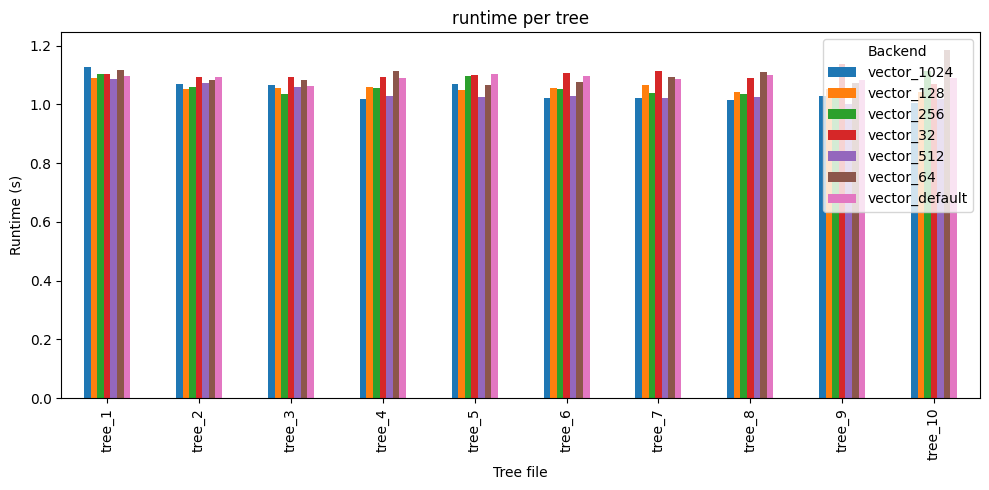

In [23]:
plot_grouped_bars(dfp_aa, logy=False, savepath=f"{cwd}/DNA_100taxa_benchmark_buildtip_likelihood.png")
